In [1]:
# prompt: monte le drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# TP - Comparez le comportement du lasso et de la régression ridge

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Specialisation_ressource/Cours3/dataTP.txt', delimiter='\t')
data.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [4]:
X= data.iloc[:,:-3]
y= data.iloc[:,2]

In [5]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [8]:
X_test.shape

(25, 8)

In [9]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
baseline_error= np.mean((model.predict(X_test)-y_test)**2)
baseline_error

4.259848888193464e-31

In [12]:
from sklearn import linear_model

In [13]:
n_alpha=50
aphas= np.logspace(-5,5,n_alpha)
ridge= linear_model.Ridge()
coefs=[]
errors=[]
for a in aphas:
  ridge.set_params(alpha=a)
  ridge.fit(X_train, y_train)
  coefs.append(ridge.coef_)
  errors.append(np.mean((ridge.predict(X_test)-y_test)**2))

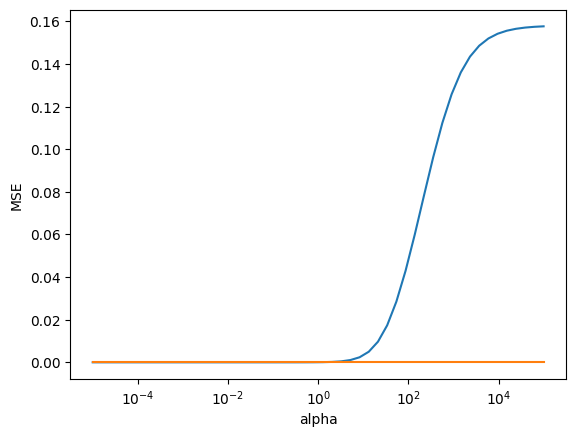

In [14]:
import matplotlib.pyplot as plt
ax=plt.gca()
ax.plot(aphas,errors, [10**-5,10**5],[baseline_error, baseline_error])
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')
plt.show()

In [15]:
np.argmin(errors)

0

In [16]:
errors[np.argmin(errors)]

5.181456604701023e-15

In [19]:
aphas[0]

1e-05

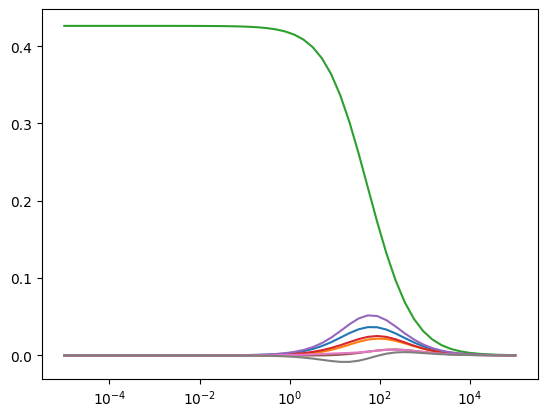

In [20]:
ax=plt.gca()
ax.plot(aphas,coefs)
ax.set_xscale('log')
plt.show()

In [21]:
n_alpha=50
alphas= np.logspace(-5,5,n_alpha)
lasso= linear_model.Lasso()
coefs=[]
errors=[]
for a in aphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)
  errors.append(np.mean((ridge.predict(X_test)-y_test)**2))

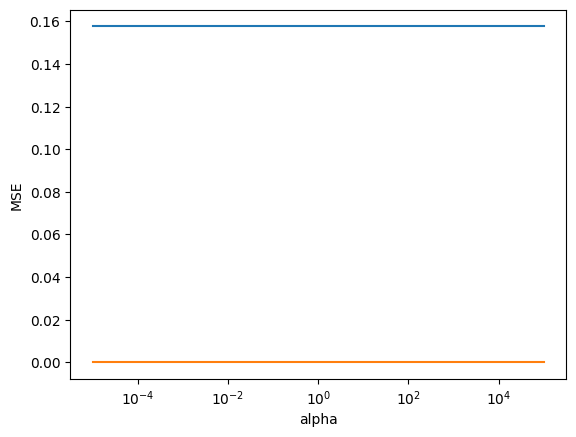

In [22]:
import matplotlib.pyplot as plt
ax=plt.gca()
ax.plot(aphas,errors, [10**-5,10**5],[baseline_error, baseline_error])
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')
plt.show()

In [23]:
np.argmin(errors)

0

In [24]:
alphas[np.argmin(errors)]

1e-05

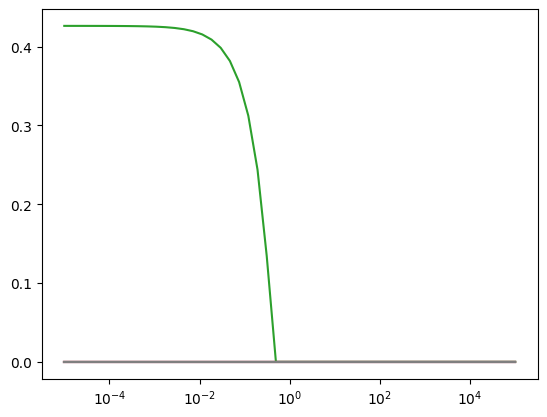

In [25]:
ax=plt.gca()
ax.plot(aphas,coefs)
ax.set_xscale('log')
plt.show()